In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df= pd.read_csv("C:\lpu\semester 5\eda and sql\climate\GlobalLandTemperaturesByCountry.csv")

In [3]:
df.shape

(577462, 4)

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [5]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [6]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [10]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [12]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [13]:
df.sample()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
376994,1850-10-01,NaN,NaN,Niger


In [14]:
pd.unique(df['AverageTemperature'])

array([ 4.384,    nan,  1.53 , ..., 22.645, 21.639, 23.529])

In [15]:
df[df['AverageTemperature'].isnull()]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
9,1744-08-01,NaN,NaN,Åland
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


In [16]:
df.loc[32651:576800,:]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
32651,1833-05-01,13.477,1.141,Asia
32652,1833-06-01,18.726,1.090,Asia
32653,1833-07-01,20.553,1.229,Asia
32654,1833-08-01,18.799,1.434,Asia
32655,1833-09-01,14.070,1.155,Asia
...,...,...,...,...
576796,1958-04-01,22.126,0.292,Zimbabwe
576797,1958-05-01,19.599,0.428,Zimbabwe
576798,1958-06-01,15.860,0.447,Zimbabwe
576799,1958-07-01,15.335,0.490,Zimbabwe


In [17]:
df['AverageTemperature'].fillna('AverageTemperature',inplace=True)

In [18]:
df.isnull().sum()

dt                                   0
AverageTemperature                   0
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [19]:
df['AverageTemperatureUncertainty'].fillna('AverageTemperatureUncertainty ',inplace=True)

In [20]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [30]:
df = df.groupby(['dt','Country'])['AverageTemperature'].mean().reset_index()

Text(0.5, 0, 'AverageTemperature')

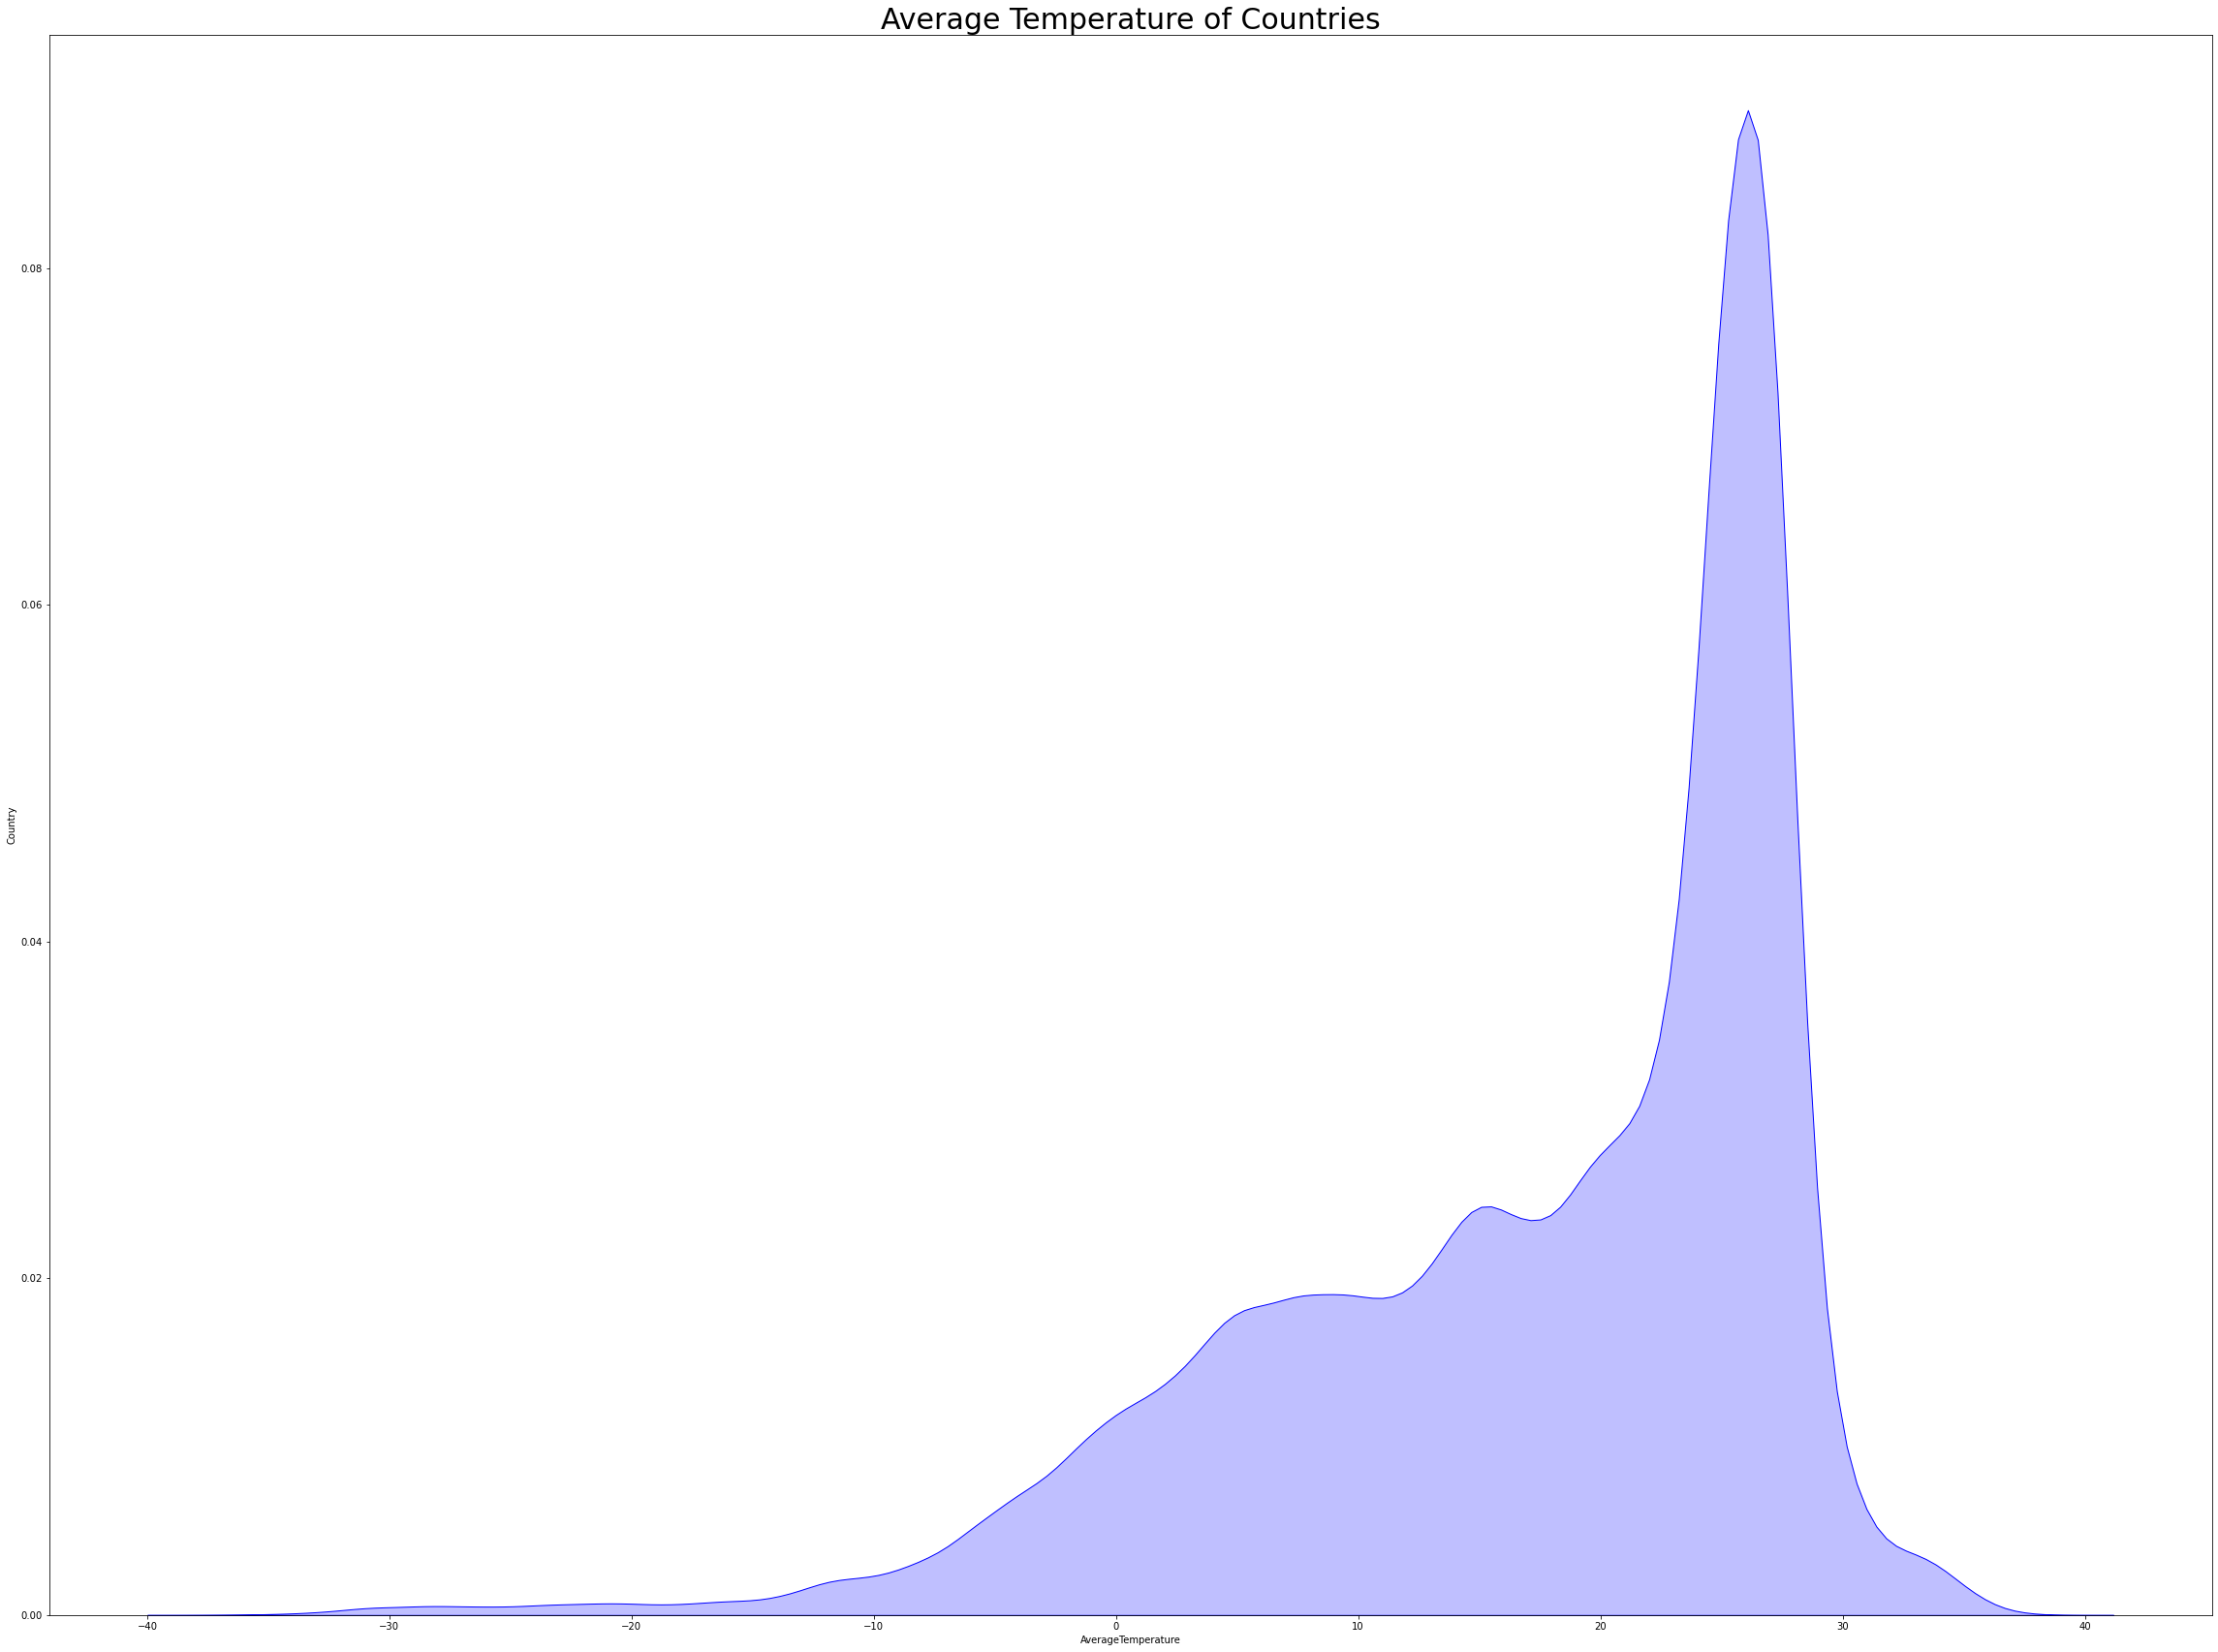

In [24]:
plt.figure(figsize=(40,30))
graph = sns.kdeplot(df.AverageTemperature,color = 'blue',shade=True)
plt.title('Average Temperature of Countries',size = 30)
plt.ylabel('Country')
plt.xlabel('AverageTemperature')

# Top ten hotest country


In [28]:
# def find_Top_10_Hottest(str):
#     top10=df[df['Country']==str]
#     top10Hot=top10.sort_values(by='AverageTemperature',ascending=False).head(10)
#     plt.figure(figsize=(25,20))
#     plt.title('Top 10 Hottest country',size=30);
#     graph=sns.barplot(x=top10Hot.Country, y =top10Hot.AVerageTemperature)
#     graph.set_xticklabels(graph.get_xticklabels(),rotation=45,horizontalalignment = 'right')
# top10 = df[df['Country'] == False]
# print(top10)
# top10Hottest=top10.sort_values(by = ['AverageTemperature'],ascending = False).head(5)
# print(top10Hottest)
top
sns.set(rc={'figure.figsize':(100,90)})
sns.lineplot(x='dt', y='Country', hue='AverageTemperature', data=df)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000014DC1E66700> (for post_execute):


KeyboardInterrupt: 

In [19]:
# find_Top_10_Hottest = top10Hottest[['Country','AverageTemperature']]

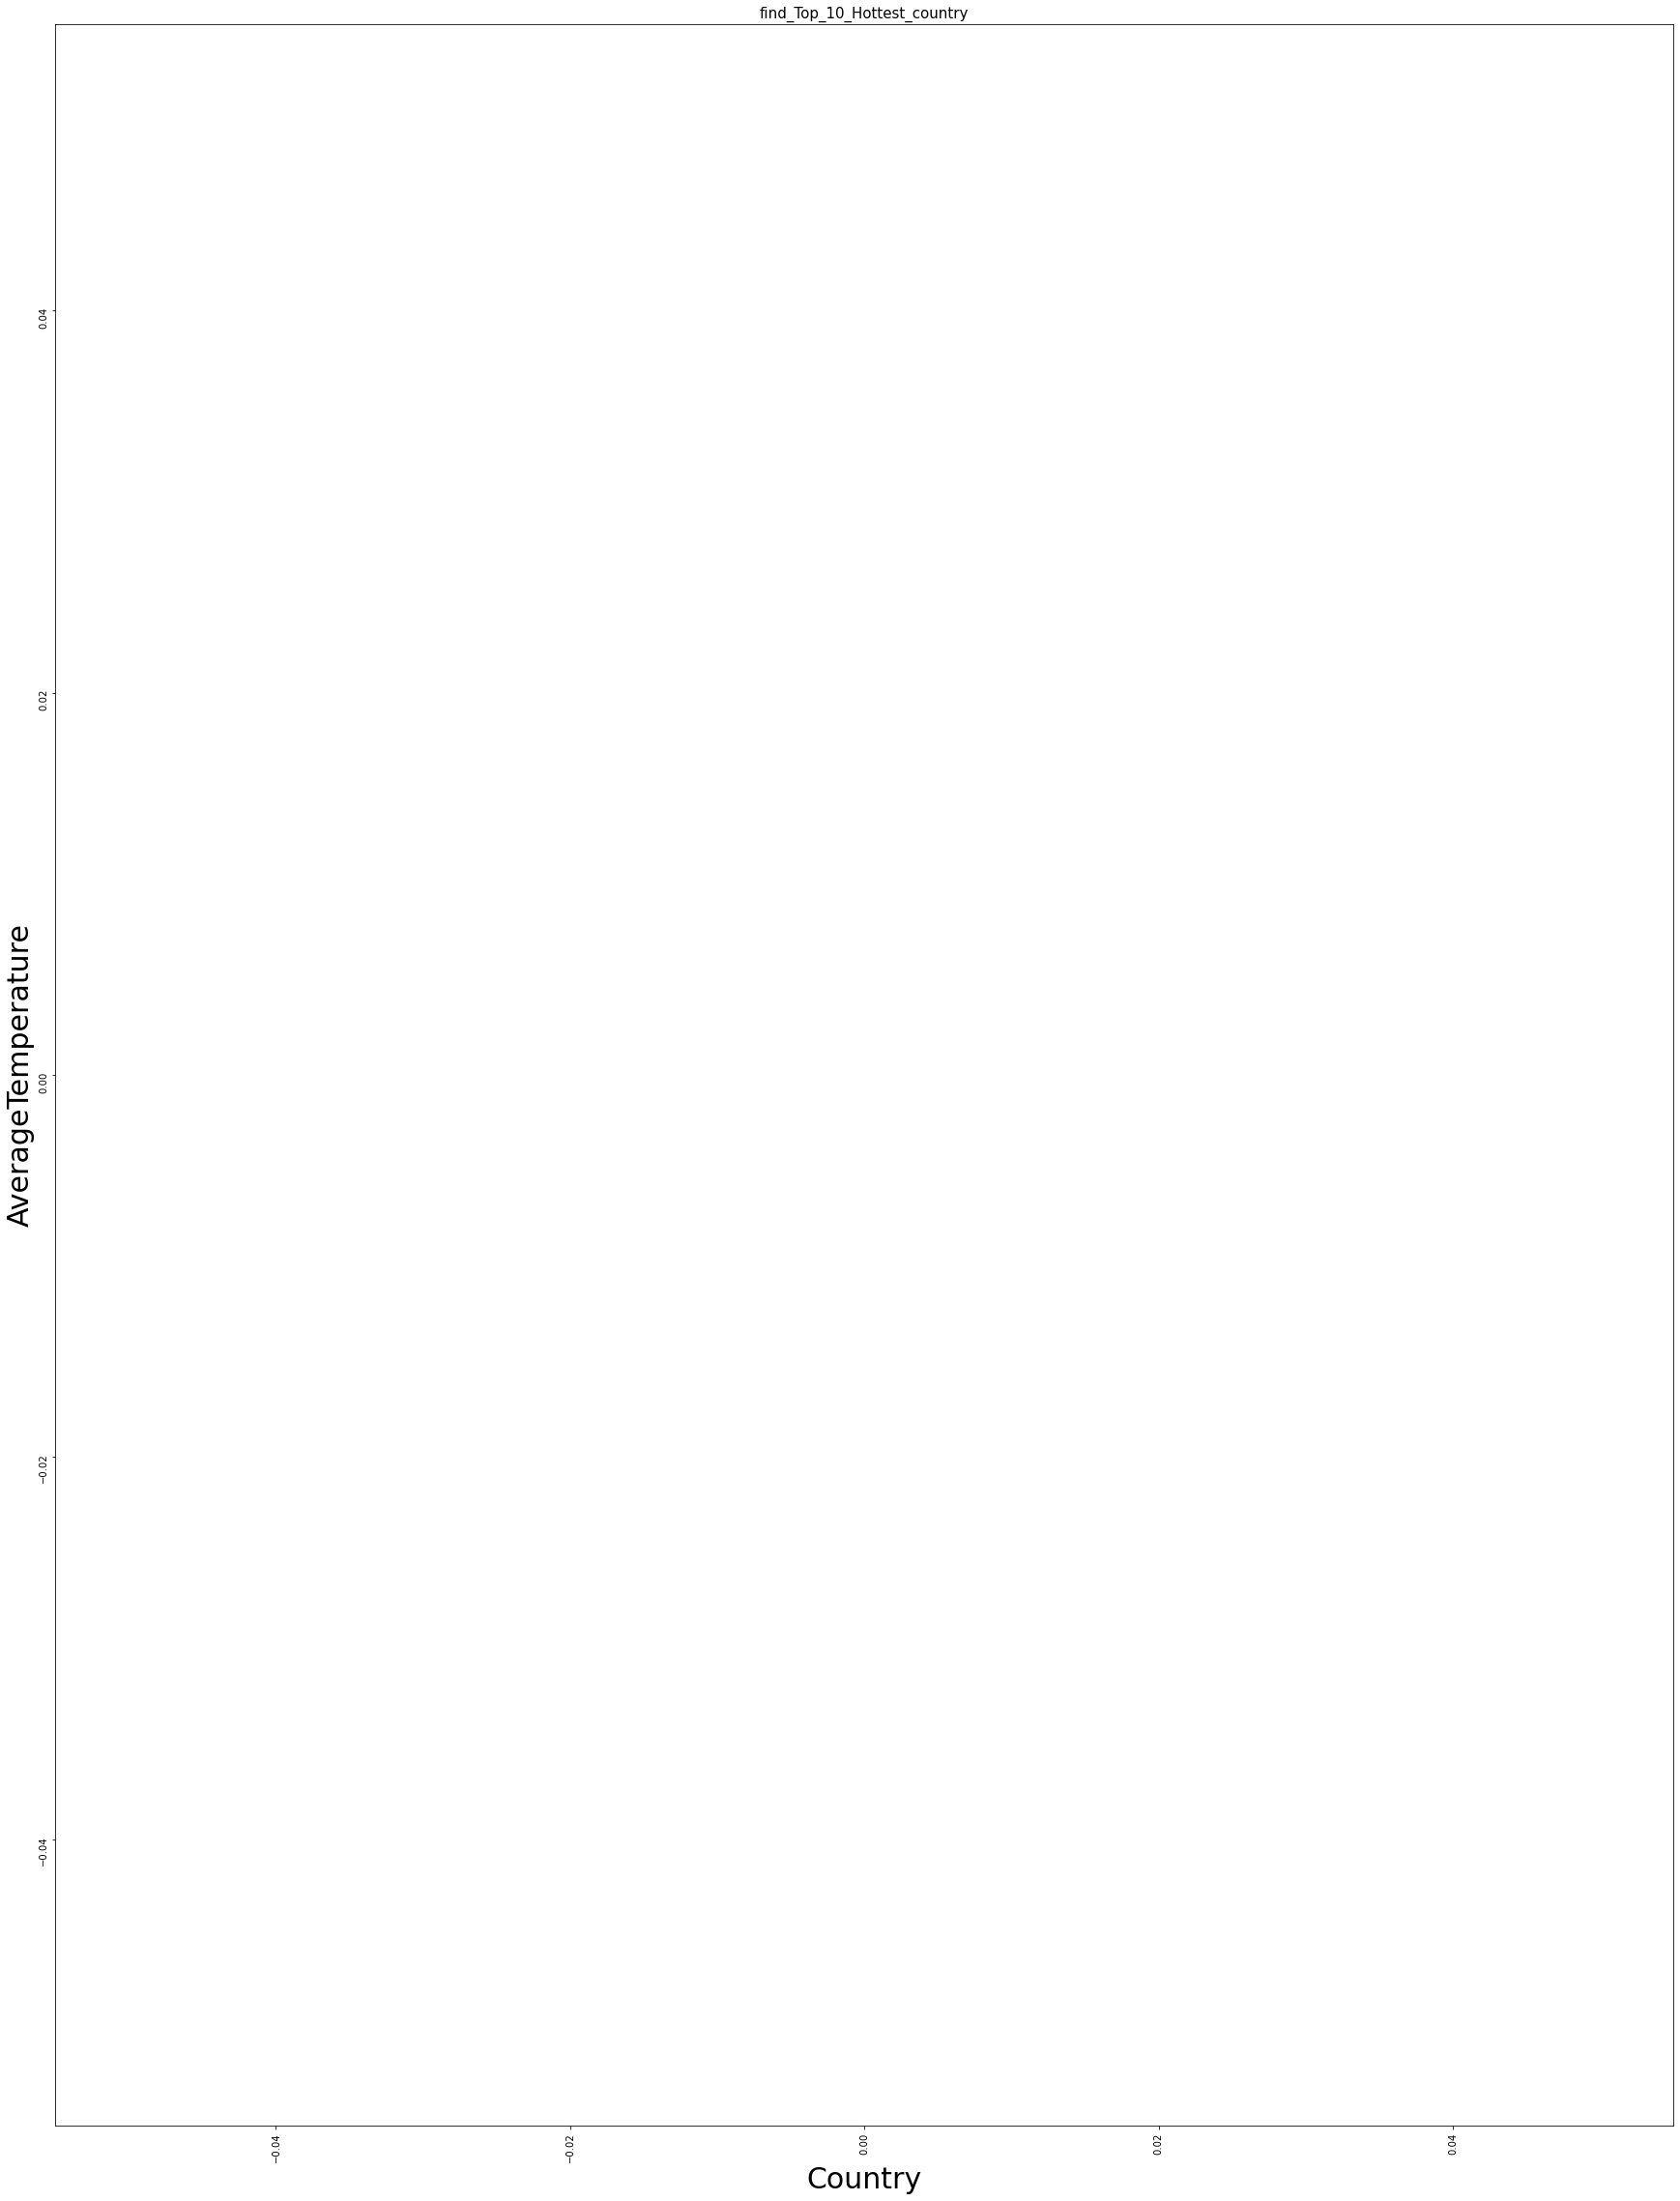

In [21]:
# plt.figure(figsize =(30,40));
# plt.xlabel('Country',size = 30)
# plt.ylabel('AverageTemperature',size=30)
# plt.bar(find_Top_10_Hottest.AverageTemperature,find_Top_10_Hottest.Country,width=1.2,labels = find_Top_10_Hottest.Country,autopct='%4.3f%%',strangle=30);
# plt.tick_params(rotation = 90)
# plt.title('find_Top_10_Hottest_country',size =15);
